# Field Data -  Example: MERRA 2








## To load netCDF4 files (aka NC4) xarray, netCDF4 and h5netcdf are required

In [1]:
import xarray as xr
import glob
import xgcm
import netCDF4
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import numpy as np
import json
# en_lat_bottom = -5
# en_lat_top = 5
# en_lon_left = -170
# en_lon_right = -120

In [47]:
## In case the libraries are not install you can install them in the following line

In [2]:
## needed libs:
# ! pip3 install netCDF4 
# ! pip install h5netcdf
# ! pip install xarray 
# ! pip install xgcm 

### Sources of the data, documentation and the meta data can be found in 

- File downloaded from NASA MERRA 2 Project for date: 20220930
- Documentation of the Files: https://gmao.gsfc.nasa.gov/pubs/docs/Bosilovich785.pdf

### NASA's EarthData Seach engine:
- https://disc.gsfc.nasa.gov/datasets?sort=endDate&project=MERRA-2
- https://goldsmr4.gesdisc.eosdis.nasa.gov/data/MERRA2_MONTHLY/M2TMNXSLV.5.12.4/

### 72 Layers datasource used in this example
- https://goldsmr5.gesdisc.eosdis.nasa.gov/data/MERRA2/M2I3NVASM.5.12.4/2022/


### For S3 AWS Access:
- https://disc.gsfc.nasa.gov/information/howto?keywords=%22Earthdata%20Cloud%22&title=How%20to%20Directly%20Access%20MERRA-2%20Data%20from%20an%20S3%20Bucket%20with%20Python%20from%20a%20Cloud%20Environment


In [4]:
file = "MERRA2_400.inst3_3d_asm_Nv.20220930.nc4"         

### xarray.open_mfdataset
- Documentation https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html
- NetCDF User Guide: https://docs.unidata.ucar.edu/nug/current/netcdf_data_set_components.html#variables
<br>
<img src="https://docs.xarray.dev/en/stable/_images/dataset-diagram.png">


In [45]:
ds = xr.open_mfdataset(file,combine='by_coords')

## Other parameters
#                       drop_variables=['DISPH','PS','QV10M','QV2M',
#                                       'SLP','T2M','TO3','TOX',
#                                       'TQI','TQL','TQV','TROPPB','TROPPT',
#                                       'TROPPV','TROPQ','TROPT','U10M','U2M',
#                                       'U50M','V10M','V2M','V50M'])#.sel(
                                               #lat=slice(en_lat_bottom,en_lat_top),
                                               # lon=slice(-en_lon_left,en_lon_right))


In [46]:
ds

<xarray.Dataset>
Dimensions:  (lon: 576, lat: 361, lev: 72, time: 8)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2022-09-30 ... 2022-09-30T21:00:00
Data variables: (12/17)
    CLOUD    (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    DELP     (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    EPV      (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    H        (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    O3       (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    OMEGA    (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    ...       ...
    QV       (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    RH       (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    SLP      (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
    T        (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    U        (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
    V        (time, lev, lat, lon) float32 dask.array<chunksize=(8, 72, 361, 576), meta=np.ndarray>
Attributes: (12/30)
    History:                           Original file generated: Mon Oct 10 21...
    Comment:                           GMAO filename: d5124_m2_jan10.inst3_3d...
    Filename:                          MERRA2_400.inst3_3d_asm_Nv.20220930.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/WWQSXQ8IVFW8
    RangeBeginningDate:                2022-09-30
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2022-09-30
    RangeEndingTime:                   21:00:00.000000

## Contour plot using matplotlib

- Example for the usage of contour and contourf functions: https://matplotlib.org/stable/gallery/images_contours_and_fields/contourf_demo.html

In [48]:
# A general plot function is made to be used in overview of data

def PlotDS(ds,ds_arr,title="",levels=10):
    f,ax = plt.subplots(1,1,figsize=(8,8))
    # Set up filled and line contours
    filled_c = ax.contourf(ds.lon, ds.lat, ds_arr, levels=levels)
    line_c = ax.contour(ds.lon, ds.lat, ds_arr, levels=levels,
                            colors=['black'])
    
    # Set up labelling for contours
    ax.clabel(line_c,  
        colors=['black'],
        manual=False,  
        inline=True,  
        fmt=' {:.0f} '.format,  
        )
    # Set up colorbar and figure title
    f.colorbar(filled_c, orientation='horizontal');
    f.suptitle(title, fontsize=14);

## Example of accessing a variable in the tensor

In [49]:
ds['T']

<xarray.DataArray 'T' (time: 8, lev: 72, lat: 361, lon: 576)>
dask.array<open_dataset-3d7391cc968c8d9fc9bf51b9c76ffc4fT, shape=(8, 72, 361, 576), dtype=float32, chunksize=(8, 72, 361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2022-09-30 ... 2022-09-30T21:00:00
Attributes:
    long_name:       air_temperature
    units:           K
    fmissing_value:  1000000000000000.0
    standard_name:   air_temperature
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

(array([   58486.,  6053786., 14430264., 26199852., 17302166., 17469838.,
        17654607., 12071463.,  8251863.,   278811.]),
 array([171.15515, 185.54944, 199.94373, 214.33803, 228.73232, 243.1266 ,
        257.5209 , 271.9152 , 286.30948, 300.70377, 315.09805],
       dtype=float32),
 <BarContainer object of 10 artists>)

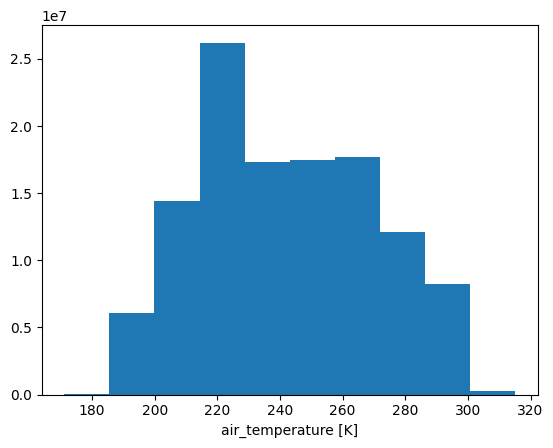

In [100]:
ds['T'].plot() ## Kelvin = C + 273.15

In [19]:
Temperature = ds['T'][0,71,:,:]

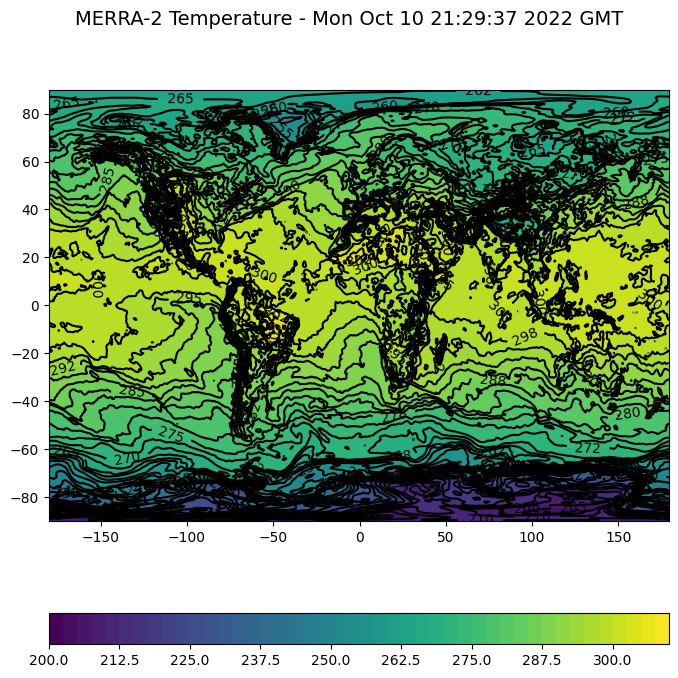

In [105]:
PlotDS(ds=ds,ds_arr=Temperature,title="MERRA-2 Temperature - Mon Oct 10 21:29:37 2022 GMT",levels=50)

In [21]:
## Surface height
PHIS = ds['PHIS'][0,:,:]

In [22]:
PHIS

<xarray.DataArray 'PHIS' (lat: 361, lon: 576)>
dask.array<getitem, shape=(361, 576), dtype=float32, chunksize=(361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
    time     datetime64[ns] 2022-09-30
Attributes:
    long_name:       surface geopotential height
    units:           m+2 s-2
    fmissing_value:  1000000000000000.0
    standard_name:   surface geopotential height
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

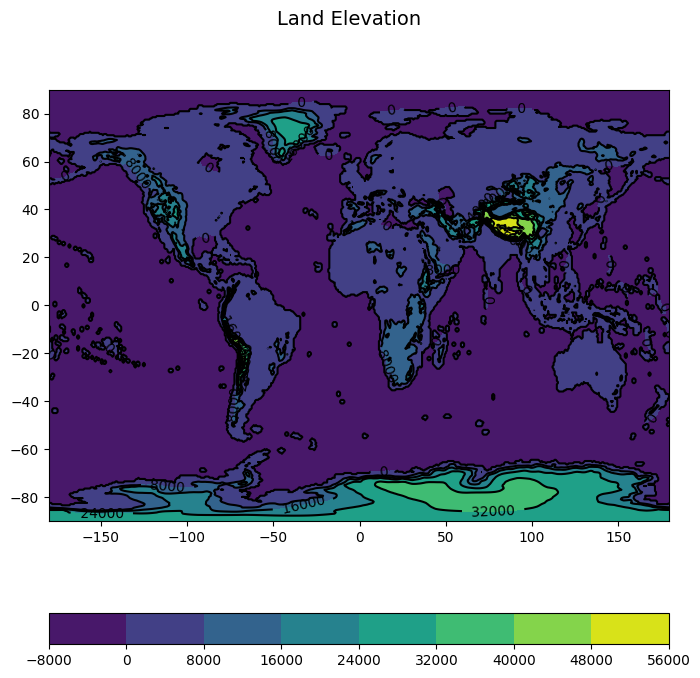

In [106]:
PlotDS(ds=ds,ds_arr=PHIS,title="Land Elevation",levels=8)

In [24]:
ds['U']

<xarray.DataArray 'U' (time: 8, lev: 72, lat: 361, lon: 576)>
dask.array<open_dataset-d1b3e2412f42d0ba1b8c64e2203a9624U, shape=(8, 72, 361, 576), dtype=float32, chunksize=(8, 72, 361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2022-09-30 ... 2022-09-30T21:00:00
Attributes:
    long_name:       eastward_wind
    units:           m s-1
    fmissing_value:  1000000000000000.0
    standard_name:   eastward_wind
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [25]:
ds['V']

<xarray.DataArray 'V' (time: 8, lev: 72, lat: 361, lon: 576)>
dask.array<open_dataset-d1b3e2412f42d0ba1b8c64e2203a9624V, shape=(8, 72, 361, 576), dtype=float32, chunksize=(8, 72, 361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2022-09-30 ... 2022-09-30T21:00:00
Attributes:
    long_name:       northward_wind
    units:           m s-1
    fmissing_value:  1000000000000000.0
    standard_name:   northward_wind
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

In [26]:
#U: Northward wind
# 12MA, Layer 41, lng, lat
# [0,41,:,:]
# ds['U'][0,41,:,:]
wind_Speed_North_nearLand_12AM = ds['V'][0,71,:,:]

In [29]:
NW = wind_Speed_North_nearLand_12AM

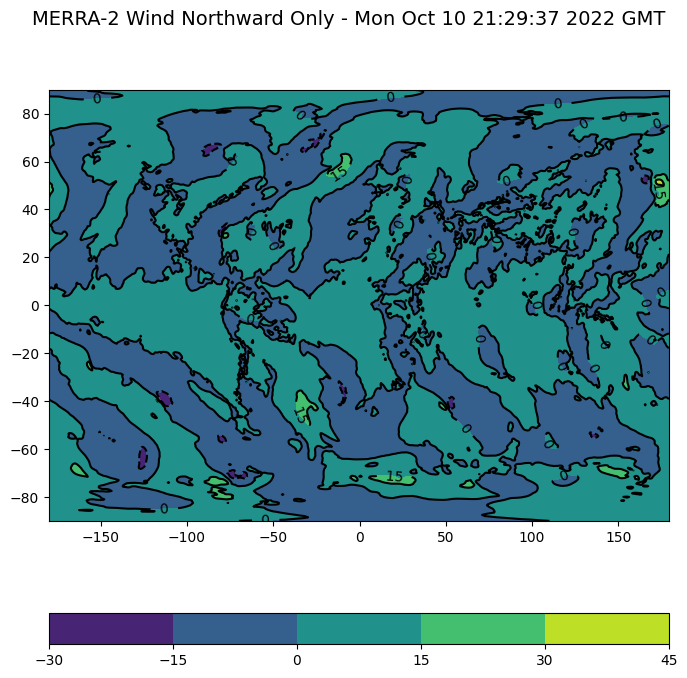

In [31]:
PlotDS(ds=ds,ds_arr=NW,title='MERRA-2 Wind Northward Only - Mon Oct 10 21:29:37 2022 GMT',levels=5)

In [32]:
## combine wind data U and V

In [33]:
X = ds['U'][0,71,:,:] ## Eastward
Y = ds['V'][0,71,:,:] ## NorthWard
## using the trigonometric equations we can find the Alphs and also wind speed in that direction
### https://numpy.org/doc/stable/reference/generated/numpy.arctan.html
WindDirection_radian = np.arctan(X/Y)

In [34]:
WindDirection_radian

<xarray.DataArray (lat: 361, lon: 576)>
dask.array<arctan, shape=(361, 576), dtype=float32, chunksize=(361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
    lev      float64 72.0
    time     datetime64[ns] 2022-09-30

In [35]:
## convert it to array 
WindDirection_radian = np.array(WindDirection_radian).round(2)

In [36]:
## The wind Speed
WindSpeed_mps =np.sqrt(X**2+Y**2).round(2)

In [37]:
WindSpeed_mps

<xarray.DataArray (lat: 361, lon: 576)>
dask.array<round_, shape=(361, 576), dtype=float32, chunksize=(361, 576), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
    lev      float64 72.0
    time     datetime64[ns] 2022-09-30

In [38]:
## to avoid missing data I will use a higher level temperature
Temperature = ds['T'][0,71,:,:]

In [110]:
## Make a D3 Friendly dataset JSON file
json_data = {
    "lon":list(np.array(ds.lon).astype("str")),
    "lat":list(np.array(ds.lat).astype("str")),
    "temperature":list(np.array(Temperature).flatten().astype("str")),
    "wind_direction":list(np.array(WindDirection_radian).flatten().astype("str")),
    "wind_speed":list(np.array(WindSpeed_mps).flatten().astype("str")),
    "U":list(np.array(X).flatten().astype("str")),
    "V":list(np.array(Y).flatten().astype("str")),
    "land_Elv":list(np.array(PHIS).flatten().astype("str"))    
}    

In [111]:
with open("MERRA2_data.json","w") as f:
    json.dump(json_data,f)